<a href="https://colab.research.google.com/github/mustafabozkaya/hands-on-transfer-learning-with-python/blob/master/notebooks/Ch05%20-%20Unleash%20the%20Power%20of%20Transfer%20Learning/Datasets%20Builder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#https://medium.com/unpackai/how-to-use-kaggle-datasets-in-google-colab-f9b2e4b5767c

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [13]:
%ls

kaggle.json


In [9]:
%cd drive/MyDrive/kaggledatasets/

/content/drive/MyDrive/kaggledatasets


In [19]:
%cd /

/


In [12]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggledatasets/"

In [ ]:
!unzip "/content/drive/MyDrive/kaggledatasets/train.zip" -d "/content/githupfolder/notebooks/datasets"

In [ ]:
#@title Download kaggle dataset after rules aggred
!kaggle competitions download -c dogs-vs-cats

In [20]:
DATA_DIR = './githupfolder/'

# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
    print('Loading data...')
    os.system('git clone https://github.com/dipanjanS/hands-on-transfer-learning-with-python ./githupfolder')
    print('Done!')

Loading data...
Done!


In [21]:
%cd content/githupfolder/notebooks/Ch05\ -\ Unleash\ the\ Power\ of\ Transfer\ Learning

/content/githupfolder/notebooks/Ch05 - Unleash the Power of Transfer Learning


In [123]:
import glob
import numpy as np
import os
import shutil
from utils import log_progress
import cv2 as cv
import matplotlib.pyplot as plt

np.random.seed(42)

In [124]:
%pwd

'/content/githupfolder/notebooks/Ch05 - Unleash the Power of Transfer Learning'

In [117]:
files = np.array(glob.glob('../datasets/train/*'))
files.shape

(25000,)

In [118]:
files[:5]

array(['../datasets/train/dog.2665.jpg', '../datasets/train/dog.7654.jpg',
       '../datasets/train/cat.344.jpg', '../datasets/train/cat.7976.jpg',
       '../datasets/train/dog.9125.jpg'], dtype='<U31')

In [129]:
cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]
len(cat_files), len(dog_files)

(12500, 12500)

In [150]:
img_=dog_files[1000]

In [151]:
#cv.imshow("cat image",cat_files[21])
img=cv.imread(img_)
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)



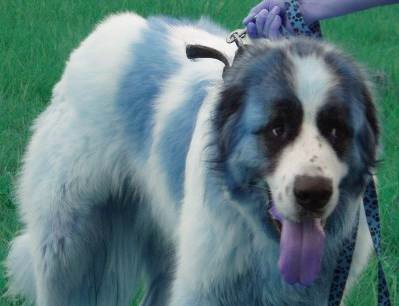

In [152]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [120]:
cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)
cat_files = list(set(cat_files) - set(cat_train))
dog_files = list(set(dog_files) - set(dog_train))

cat_val = np.random.choice(cat_files, size=500, replace=False)
dog_val = np.random.choice(dog_files, size=500, replace=False)
cat_files = list(set(cat_files) - set(cat_val))
dog_files = list(set(dog_files) - set(dog_val))

cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)

print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

Cat datasets: (1500,) (500,) (500,)
Dog datasets: (1500,) (500,) (500,)


In [121]:
cat_train[:2],dog_train[:2]

(array(['../datasets/train/cat.4631.jpg', '../datasets/train/cat.8660.jpg'],
       dtype='<U31'), array(['../datasets/train/dog.3378.jpg',
        '../datasets/train/dog.10083.jpg'], dtype='<U31'))

In [40]:

train_files = np.concatenate([cat_train, dog_train])
validate_files = np.concatenate([cat_val, dog_val])
test_files = np.concatenate([cat_test, dog_test])


In [41]:
print('train datasets:', train_files.shape, validate_files.shape, test_files.shape)

train datasets: (3000,) (1000,) (1000,)


In [92]:
data_dir="/content/githupfolder/notebooks/datasets/dog_cat"
if not os.path.exists(data_dir):
  os.mkdir(data_dir)

train_dir = "train_data"
val_dir = "validation_data"
test_dir = "test_data"


In [93]:
os.chdir("/content/githupfolder/notebooks/Ch05 - Unleash the Power of Transfer Learning/")


In [134]:
os.mkdir(os.path.join(data_dir,train_dir)) if not os.path.exists(os.path.join(data_dir,train_dir)) else None
os.mkdir(os.path.join(data_dir,val_dir)) if not os.path.exists(os.path.join(data_dir,val_dir)) else None
os.mkdir(os.path.join(data_dir,test_dir)) if not os.path.exists(os.path.join(data_dir,test_dir)) else None

for fn in log_progress(train_files, name='Training Images'):
    shutil.copy(fn, os.path.join(data_dir,train_dir))

for fn in log_progress(validate_files, name='Validation Images'):
    shutil.copy(fn, os.path.join(data_dir,val_dir) )
    
for fn in log_progress(test_files, name='Test Images'):
    shutil.copy(fn, os.path.join(data_dir,test_dir) )

In [153]:
%ls

'Basic CNN Model.ipynb'              'Model Performance Evaluations.ipynb'
'CNN with Image Augmentation.ipynb'   __pycache__/
'CNN with Transfer Learning.ipynb'    test_data/
'Datasets Builder.ipynb'              utils.py
 model_evaluation_utils.py            validation_data/


In [157]:
import pandas as pd

train_=pd.DataFrame([image_f for image_f in os.listdir(os.path.join(data_dir,train_dir))],columns=["img_file"])


In [158]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_file  3000 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB
